# EEG- Alcohol DATA : EEG correlates of genetic predisposition to alcoholism

## Visualzing Data

### 1. Importing packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### 2. Reading file names

In [2]:
test_filenames = os.listdir('Data\SMNI_CMI_TEST\Test')
train_filenames= os.listdir('Data\SMNI_CMI_TRAIN\Train')

### 3. Loading a file

In [3]:
filename = 'Data/SMNI_CMI_TRAIN/Train/'+ train_filenames[0]
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


### 4. Identifying Labels and Features

In [4]:
labels = 'subject identifier'
features = 'sensor value'
print('Labels: ',labels)
print('Features: ',features)

Labels:  subject identifier
Features:  sensor value


In [5]:
X = df[features]
y = df[labels]
X,y[0]

(0        -8.921
 1        -8.433
 2        -2.574
 3         5.239
 4        11.587
           ...  
 16379     6.571
 16380    12.431
 16381    15.849
 16382    16.337
 16383    14.872
 Name: sensor value, Length: 16384, dtype: float64,
 'a')

### There are 256 time sequences with 64 channels

### 5. Preparing to vizualize

In [6]:
count = 0
main_Dict = {}
value_list = []
s_name = ''

for name in  df['sensor position']:
    if s_name != '':
        if ((count +1) == len(df['sensor position'])):
            value_list.append(df['sensor value'][count])
            main_Dict[s_name] = value_list
        elif name != s_name:
            main_Dict[s_name] = value_list
            value_list = []
            value_list.append(df['sensor value'][count])
        else:
            value_list.append(df['sensor value'][count])
    else:
        value_list.append(df['sensor value'][count])
    count +=1
    s_name = name
print('All the channels(64): \n',main_Dict.keys())
voltage_list = []
channel_list = []
for channel in main_Dict:
    temp_list_1 = []
    for value in main_Dict[channel]:
        temp_list_1.append(value)
    voltage_list.append(temp_list_1)
    channel_list.append(channel)
noOfvalues = []
for i in range(len(voltage_list[0])):
    noOfvalues.append(i)

All the channels(64): 
 dict_keys(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6', 'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6', 'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2', 'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4', 'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4', 'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2', 'P1', 'CPZ', 'nd', 'Y'])


### 6. Visualizing Data

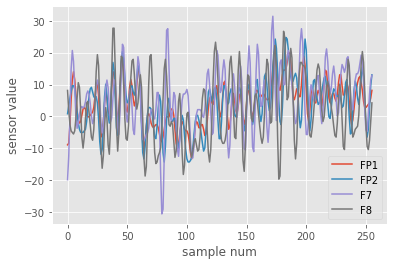

<Figure size 432x288 with 0 Axes>

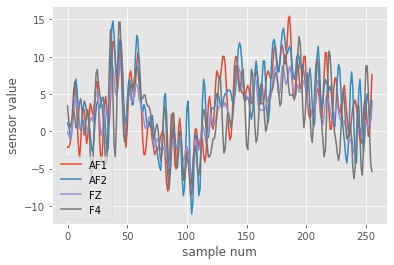

<Figure size 432x288 with 0 Axes>

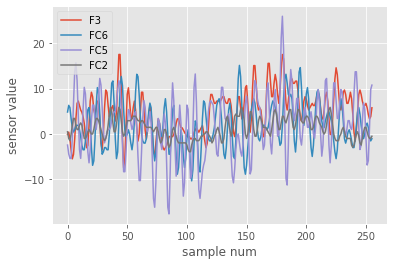

<Figure size 432x288 with 0 Axes>

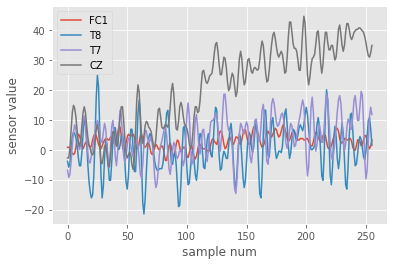

<Figure size 432x288 with 0 Axes>

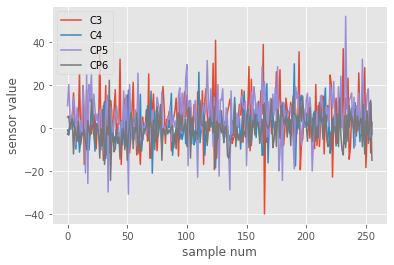

<Figure size 432x288 with 0 Axes>

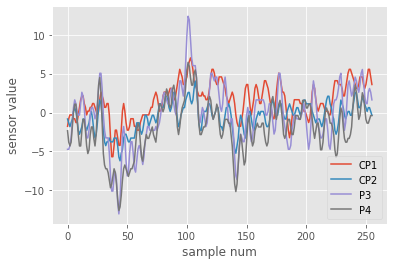

<Figure size 432x288 with 0 Axes>

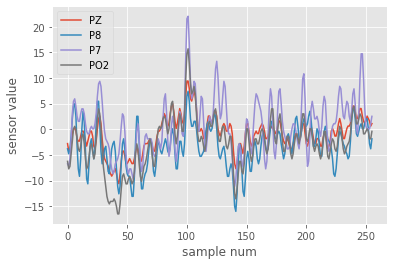

<Figure size 432x288 with 0 Axes>

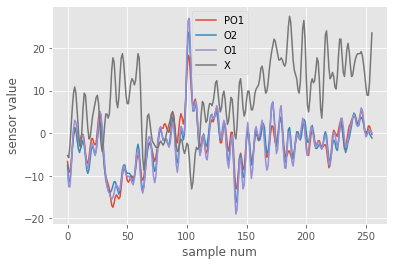

<Figure size 432x288 with 0 Axes>

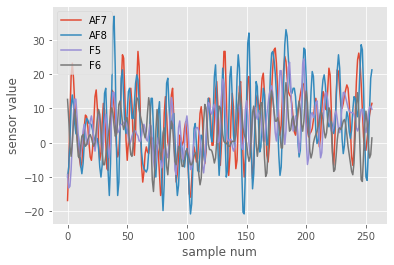

<Figure size 432x288 with 0 Axes>

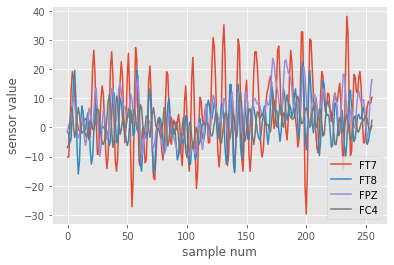

<Figure size 432x288 with 0 Axes>

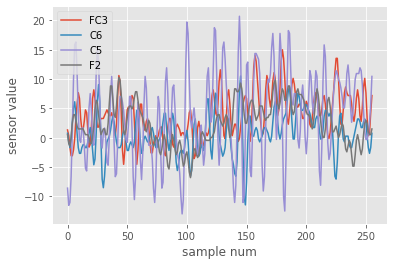

<Figure size 432x288 with 0 Axes>

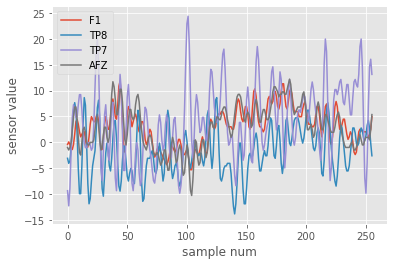

<Figure size 432x288 with 0 Axes>

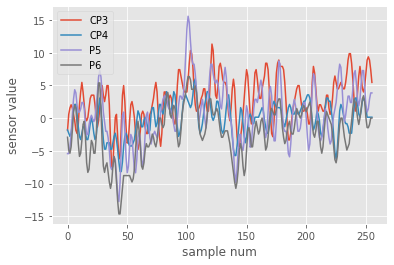

<Figure size 432x288 with 0 Axes>

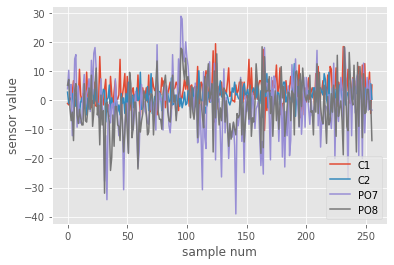

<Figure size 432x288 with 0 Axes>

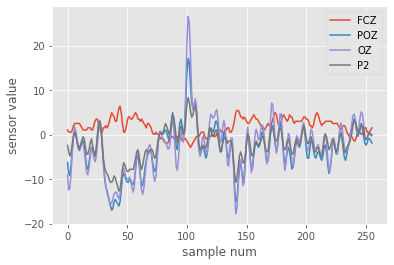

<Figure size 432x288 with 0 Axes>

In [21]:
count = 0
for _ in range(15):
    for i in range(4):
        plt.plot(voltage_list[count],label =channel_list[count])
        count += 1
    plt.legend(channel_list[count - 4:count])
    plt.xlabel('sample num')
    plt.ylabel('sensor value')
    plt.figure()
    plt.show()

## Importing all Training and testing Data

In [8]:
def makingLayers(input_list):
    pix = []
    for _ in range(256):
        pix.append([])
    count = 0
    for _ in range(64):
        for i in range(256):
            pix[i].append([input_list[count][1]])
#             pix[i].append(input_list[count][1])
            count +=1
    return pix

#### 1. Importing training Data

In [9]:
training_Features = []
training_Labels = []
chategorical_to_numeric = {'matching condition':{'S1 obj':0, 'S2 match':1,'S2 nomatch,':2}}

for name in train_filenames:
    filename = 'Data/SMNI_CMI_TRAIN/Train/'+ name
    df = pd.read_csv(filename)
    df_label = df.pop('subject identifier')
    if df_label[0] == 'a':
        training_Labels.append(1)
    else:
        training_Labels.append(0)
    df.drop(['Unnamed: 0','sensor position','trial number','name','time'], axis = 1,inplace=True)
    df_1 = df
    training_Features.append(makingLayers(df.values.tolist()))

#### 2. Making numpy arrays using Data

In [10]:
training_Features = np.array(training_Features)
training_Features = training_Features.astype(np.float)/1000
training_Labels = np.array(training_Labels)
training_Labels = training_Labels.astype(int)
training_Features.shape,training_Labels.shape

((468, 256, 64, 1), (468,))

#### 3. Importing testing Data

In [11]:
testing_Features = []
testing_Labels = []
chategorical_to_numeric = {'matching condition':{'S1 obj':0, 'S2 match':1,'S2 nomatch,':2}}

for name in test_filenames:
    filename = 'Data/SMNI_CMI_TEST/Test/'+ name
    df = pd.read_csv(filename)
    df_label = df.pop('subject identifier')
    if df_label[0] == 'a':
        testing_Labels.append(1)
    else:
        testing_Labels.append(0)
    df.drop(['Unnamed: 0','sensor position','trial number','name','time'], axis = 1,inplace=True)
    testing_Features.append(makingLayers(df.values.tolist()))

#### 4. Making numpy arrays using Data

In [12]:
testing_Features = np.array(testing_Features)
testing_Features = testing_Features.astype(np.float)/1000
testing_Labels = np.array(testing_Labels)
testing_Labels = testing_Labels.astype(int)
testing_Features.shape,testing_Labels.shape

((480, 256, 64, 1), (480,))

In [13]:
training_Features.reshape([-1,1])
testing_Features.reshape([-1,1])

array([[-0.00355 ],
       [-0.004476],
       [-0.001017],
       ...,
       [ 0.006765],
       [ 0.014496],
       [ 0.000102]])

## Making the models

#### 1. Importing Packages

In [14]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#### 2. Making the model

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(256,64,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss ='BinaryCrossentropy',
                        metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 63, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 31, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 125984)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               32252160  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4

#### 3. Training the model

In [16]:
Results = model.fit(training_Features,training_Labels,batch_size =28,verbose = 1 , epochs = 100,validation_data = (testing_Features,testing_Labels))

Epoch 1/100
17/17 [==============================] - 5s 284ms/step - loss: 0.6928 - accuracy: 0.5705 - val_loss: 0.6690 - val_accuracy: 0.6417
Epoch 2/100
17/17 [==============================] - 5s 275ms/step - loss: 0.6414 - accuracy: 0.6816 - val_loss: 0.5972 - val_accuracy: 0.6625
Epoch 3/100
17/17 [==============================] - 5s 273ms/step - loss: 0.5700 - accuracy: 0.7372 - val_loss: 0.5458 - val_accuracy: 0.6979
Epoch 4/100
17/17 [==============================] - 5s 272ms/step - loss: 0.3892 - accuracy: 0.8248 - val_loss: 0.7264 - val_accuracy: 0.6562
Epoch 5/100
17/17 [==============================] - 5s 270ms/step - loss: 0.3625 - accuracy: 0.8504 - val_loss: 0.3991 - val_accuracy: 0.8188
Epoch 6/100
17/17 [==============================] - 5s 267ms/step - loss: 0.2811 - accuracy: 0.8761 - val_loss: 0.4265 - val_accuracy: 0.7979
Epoch 7/100
17/17 [==============================] - 5s 271ms/step - loss: 0.1959 - accuracy: 0.9316 - val_loss: 0.3787 - val_accuracy: 0.8438

Epoch 57/100
17/17 [==============================] - 5s 270ms/step - loss: 4.8052e-06 - accuracy: 1.0000 - val_loss: 0.8688 - val_accuracy: 0.8687
Epoch 58/100
17/17 [==============================] - 5s 269ms/step - loss: 4.1430e-06 - accuracy: 1.0000 - val_loss: 0.8863 - val_accuracy: 0.8667
Epoch 59/100
17/17 [==============================] - 4s 263ms/step - loss: 3.6666e-06 - accuracy: 1.0000 - val_loss: 0.8948 - val_accuracy: 0.8687
Epoch 60/100
17/17 [==============================] - 5s 267ms/step - loss: 3.3234e-06 - accuracy: 1.0000 - val_loss: 0.8974 - val_accuracy: 0.8729
Epoch 61/100
17/17 [==============================] - 5s 266ms/step - loss: 2.9227e-06 - accuracy: 1.0000 - val_loss: 0.9187 - val_accuracy: 0.8667
Epoch 62/100
17/17 [==============================] - 5s 270ms/step - loss: 2.6820e-06 - accuracy: 1.0000 - val_loss: 0.9191 - val_accuracy: 0.8667
Epoch 63/100
17/17 [==============================] - 5s 275ms/step - loss: 2.4410e-06 - accuracy: 1.0000 - val_

#### 4. Accuracy of  the model

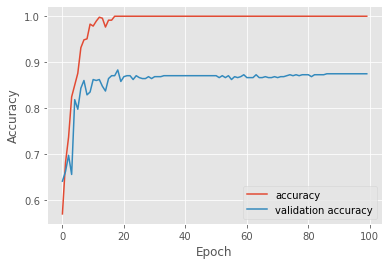

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.plot(Results.history['accuracy'])
plt.plot(Results.history['val_accuracy'])
plt.legend(["accuracy", "validation accuracy"], loc ="lower right")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure()
plt.show()